# Imports

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gzip
import shutil
import os
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import acquire_nick as an
import prepare_nick as pn
import wrangle as w

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = w.wrangle_df()
df.head()

Using cached CSV


,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,0,1995-12-09,1995,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0
6,Judgment Night,0,3.883820,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,10000000.0,12136938.0,2136938.0,6.4,79.0,UniversalPictures LargoEntertainment JVCEntert...,Japan UnitedStatesofAmerica,"While racing to a boxing match, Frank, Mike, J...",5.538671,110.0,0,1993-10-15,1993,tt0107286,UniversalPictures,0,0,0,0,0,1,1,0,0,1,0,0,0
11,Star Wars,1,285.487448,Adventure Action Science Fiction,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCenturyFoxFilmCorporation,UnitedStatesofAmerica,Princess Leia is captured and held hostage by ...,42.149697,121.0,1,1977-05-25,1977,tt0076759,Lucasfilm,1,0,0,1,0,0,0,0,0,1,0,0,0
12,Finding Nemo,1,38.013564,Animation Family,Albert Brooks,Ellen DeGeneres,Alexander Gould,24.0,94000000.0,940335536.0,846335536.0,7.6,6292.0,PixarAnimationStudios,UnitedStatesofAmerica,"Nemo, an adventurous young clownfish, is unexp...",25.497794,100.0,1,2003-05-30,2003,tt0266543,PixarAnimationStudios,0,0,0,0,0,0,0,0,1,0,0,0,0
13,Forrest Gump,1,50.537748,Comedy Drama Romance,Tom Hanks,Robin Wright,Gary Sinise,66.0,55000000.0,677945399.0,622945399.0,8.2,8147.0,ParamountPictures,UnitedStatesofAmerica,A man with a low IQ has accomplished great thi...,48.307194,142.0,1,1994-07-06,1994,tt0109830,ParamountPictures,0,0,1,0,1,0,0,1,0,0,0,0,0


In [3]:
df.shape

(6893, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6893 entries, 5 to 443319
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 6893 non-null   object 
 1   success               6893 non-null   int64  
 2   success_rating        6893 non-null   float64
 3   genres                6891 non-null   object 
 4   cast_actor_1          6893 non-null   object 
 5   cast_actor_2          6893 non-null   object 
 6   cast_actor_3          6893 non-null   object 
 7   total_n_cast          6893 non-null   float64
 8   budget                6893 non-null   float64
 9   revenue               6893 non-null   float64
 10  profit_amount         6893 non-null   float64
 11  vote_average          6893 non-null   float64
 12  vote_count            6893 non-null   float64
 13  production_companies  6893 non-null   object 
 14  production_countries  6893 non-null   object 
 15  overview           

In [5]:
df.describe()

,success,success_rating,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,popularity,runtime,profitable,release_year,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
count,6893.000000,6893.000000,6893.000000,6.893000e+03,6.893000e+03,6.893000e+03,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000
mean,0.388365,9.681530,22.313361,2.712073e+07,7.356855e+07,4.644782e+07,6.259234,599.120847,8.986854,108.396489,0.407660,1999.471058,0.156536,0.103583,0.498767,0.104744,0.194545,0.261860,0.152909,0.351081,0.052372,0.242710,0.078921,0.087335,0.017844
std,0.487414,21.848662,19.102737,3.612200e+07,1.506686e+08,1.262272e+08,0.938088,1136.481658,12.449917,20.782590,0.491435,15.708290,0.363389,0.304741,0.500035,0.306245,0.395879,0.439679,0.359926,0.477343,0.222792,0.428752,0.269634,0.282346,0.132395
min,0.000000,0.000000,3.000000,1.020000e+06,1.000000e+00,-1.657101e+08,0.000000,0.000000,0.000578,0.000000,0.000000,1915.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.989076,12.000000,1.000000e+07,3.442853e+06,-7.953834e+06,5.700000,54.000000,4.743517,95.000000,0.000000,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.330402,17.000000,1.000000e+07,1.968292e+07,4.917287e+06,6.300000,193.000000,7.805145,105.000000,0.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.588779,25.000000,3.000000e+07,7.415135e+07,4.500000e+07,6.900000,595.000000,11.174041,118.000000,1.000000,2011.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,667.333333,313.000000,3.800000e+08,2.787965e+09,2.550965e+09,10.000000,14075.000000,547.488298,338.000000,1.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['success_rating'] = (df['revenue']/(df['budget'] * 2)) * df['vote_average']

In [7]:
df.head(5)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,0,1995-12-09,1995,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0
6,Judgment Night,0,3.883820,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,10000000.0,12136938.0,2136938.0,6.4,79.0,UniversalPictures LargoEntertainment JVCEntert...,Japan UnitedStatesofAmerica,"While racing to a boxing match, Frank, Mike, J...",5.538671,110.0,0,1993-10-15,1993,tt0107286,UniversalPictures,0,0,0,0,0,1,1,0,0,1,0,0,0
11,Star Wars,1,285.487448,Adventure Action Science Fiction,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCenturyFoxFilmCorporation,UnitedStatesofAmerica,Princess Leia is captured and held hostage by ...,42.149697,121.0,1,1977-05-25,1977,tt0076759,Lucasfilm,1,0,0,1,0,0,0,0,0,1,0,0,0
12,Finding Nemo,1,38.013564,Animation Family,Albert Brooks,Ellen DeGeneres,Alexander Gould,24.0,94000000.0,940335536.0,846335536.0,7.6,6292.0,PixarAnimationStudios,UnitedStatesofAmerica,"Nemo, an adventurous young clownfish, is unexp...",25.497794,100.0,1,2003-05-30,2003,tt0266543,PixarAnimationStudios,0,0,0,0,0,0,0,0,1,0,0,0,0
13,Forrest Gump,1,50.537748,Comedy Drama Romance,Tom Hanks,Robin Wright,Gary Sinise,66.0,55000000.0,677945399.0,622945399.0,8.2,8147.0,ParamountPictures,UnitedStatesofAmerica,A man with a low IQ has accomplished great thi...,48.307194,142.0,1,1994-07-06,1994,tt0109830,ParamountPictures,0,0,1,0,1,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='id'>

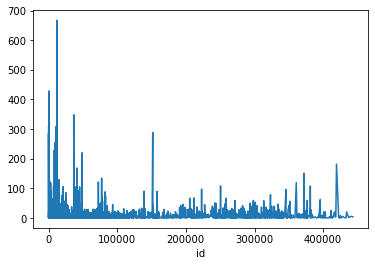

In [8]:
df.success_rating.plot()

In [26]:
df['success'] = (df['success_rating'] > 6.5) * 1

In [27]:
df.sample(10)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41402,Let Me In,0,4.044390,Drama Horror Mystery,Kodi Smit-McPhee,Chloë Grace Moretz,Richard Jenkins,24.0,20000000.0,24145613.0,4145613.0,6.7,656.0,HammerFilmProductions EFTI ExclusiveMediaGroup...,UnitedKingdom UnitedStatesofAmerica,A bullied young boy befriends a young female v...,11.119460,116.0,0,2010-10-01,2010,tt1228987,HammerFilmProductions,0,1,1,0,0,0,0,0,0,0,1,0,0
59968,Our Idiot Brother,0,5.095710,Comedy Drama,Paul Rudd,Elizabeth Banks,Zooey Deschanel,26.0,10000000.0,17273593.0,7273593.0,5.9,369.0,TheWeinsteinCompany LikelyStory BigBeachFilms ...,UnitedStatesofAmerica,Everybody has the sibling who is always just a...,5.918193,90.0,0,2011-08-26,2011,tt1637706,TheWeinsteinCompany,0,0,1,0,0,0,0,1,0,0,0,0,0
4597,Armored,0,3.154555,Action Crime Drama Thriller,Columbus Short,Laurence Fishburne,Skeet Ulrich,16.0,20000000.0,22942221.0,2942221.0,5.5,211.0,ScreenGems StarsRoadEntertainment FarahFilms&M...,UnitedStatesofAmerica,A crew of officers at an armored transport sec...,9.951662,88.0,0,2009-12-04,2009,tt0913354,ScreenGems,0,0,1,0,0,1,1,0,0,1,0,0,0
13195,Flawless,0,1.125232,Crime Drama Thriller,Demi Moore,Michael Caine,Lambert Wilson,16.0,20000000.0,6819587.0,-13180413.0,6.6,142.0,MagnoliaPictures DeluxProductions ZeroGravityM...,UnitedKingdom Luxembourg,A female executive (Demi Moore) and a night ja...,6.496913,108.0,0,2007-09-01,2007,tt0780516,MagnoliaPictures,0,0,1,0,0,1,1,0,0,0,0,0,0
72358,A Thousand Words,0,1.653321,Drama Comedy,Eddie Murphy,Allison Janney,Cliff Curtis,44.0,40000000.0,22044277.0,-17955723.0,6.0,381.0,ParamountPictures DreamWorksSKG SaturnFilms Va...,UnitedStatesofAmerica,"Jack McCall is a fast-talking literary agent, ...",5.446745,91.0,0,2012-03-07,2012,tt0763831,ParamountPictures,0,0,1,0,0,0,0,1,0,0,0,0,0
9882,The Siege,0,5.083605,Drama Action Thriller Crime,Denzel Washington,Annette Bening,Bruce Willis,14.0,70000000.0,116672912.0,46672912.0,6.1,361.0,TwentiethCenturyFoxFilmCorporation LyndaObstPr...,UnitedStatesofAmerica,The secret US abduction of a suspected terrori...,9.019114,116.0,0,1998-11-06,1998,tt0133952,TwentiethCenturyFoxFilmCorporation,0,0,1,0,0,1,1,0,0,1,0,0,0
10192,Shrek Forever After,1,13.683652,Comedy Adventure Fantasy Animation Family,Mike Myers,Eddie Murphy,Cameron Diaz,35.0,165000000.0,752600867.0,587600867.0,6.0,2021.0,DreamWorksAnimation,UnitedStatesofAmerica,A bored and domesticated Shrek pacts with deal...,11.803808,93.0,1,2010-05-16,2010,tt0892791,DreamWorksAnimation,1,0,0,0,0,0,0,1,1,0,0,1,0
242512,Ouija,1,50.759233,Horror,Olivia Cooke,Ana Coto,Daren Kagasoff,19.0,5000000.0,103590271.0,98590271.0,4.9,1006.0,UniversalPictures DentsuInc. PlatinumDunes Med...,Japan UnitedStatesofAmerica,A group of friends must confront their most te...,13.288564,89.0,1,2014-10-24,2014,tt1204977,UniversalPictures,0,1,0,0,0,0,0,0,0,0,0,0,0
1427,Perfume: The Story of a Murderer,1,9.384803,Crime Fantasy Drama,Ben Whishaw,Simon Chandler,David Calder,24.0,50000000.0,132180323.0,82180323.0,7.1,1198.0,Davis-Films NouvellesÉditionsdeFilms(NEF) Risi...,Spain Germany France,"Jean-Baptiste Grenouille, born in the stench o...",10.297304,147.0,1,2006-09-13,2006,tt0396171,Davis-Films,0,0,1,0,0,0,1,0,0,0,0,1,0


In [11]:
# One Hot Encode for Genres

# df['is_genre_adventure'] = df.genres.apply(lambda genre_list: 'Adventure' in genre_list)
# df['is_genre_horror'] = df.genres.apply(lambda genre_list: 'Horror' in genre_list)
# df['is_genre_drama'] = df.genres.apply(lambda genre_list: 'Drama' in genre_list)
# df['is_genre_scifi'] = df.genres.apply(lambda genre_list: 'Science' in genre_list)
# df['is_genre_romance'] = df.genres.apply(lambda genre_list: 'Romance' in genre_list)
# df['is_genre_thriller'] = df.genres.apply(lambda genre_list: 'Thriller' in genre_list)
# df['is_genre_crime'] = df.genres.apply(lambda genre_list: 'Crime' in genre_list)
# df['is_genre_comedy'] = df.genres.apply(lambda genre_list: 'Comedy' in genre_list)
# df['is_genre_animation'] = df.genres.apply(lambda genre_list: 'Animation' in genre_list)
# df['is_genre_action'] = df.genres.apply(lambda genre_list: 'Action' in genre_list)
# df['is_genre_mystery'] = df.genres.apply(lambda genre_list: 'Mystery' in genre_list)
# df['is_genre_fantasy'] = df.genres.apply(lambda genre_list: 'Fantasy' in genre_list)
# df['is_genre_documentary'] = df.genres.apply(lambda genre_list: 'Documentary' in genre_list)

In [12]:
df.shape

(6893, 36)

In [28]:
def train_validate_test_split(df):
    ''' 
    This function takes in a dataframe and splits it 80:20.  The 20% will be our testing datafrme for our final model.  The 80% will be split a second time (70:30), creating our final training dataframe and a dataframe to validate our model with before testing.  Leaving us we a Train (56%), Validate(24%) and Test (20%) Dataframe from our original data (100%)
    '''
    
    train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=1313)
    
    
    train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  random_state=1313)
    
    
    return train, validate, test


train, validate, test = train_validate_test_split(df)

train.shape, validate.shape, test.shape

((3859, 36), (1655, 36), (1379, 36))

In [29]:
# Variables for constructing models
x_train = train.drop(columns=['success', 'revenue', 'vote_average'])
y_train = train.success

x_validate = validate.drop(columns=['success', 'revenue', 'vote_average'])
y_validate = validate.success

x_test = test.drop(columns=['success', 'revenue', 'vote_average'])
y_test = test.success

In [30]:
train.success.value_counts()

0    2358
1    1501
Name: success, dtype: int64

In [31]:
# Now that our training sample is ready, lets set up a baseline accuracy to improve upon
train['baseline'] = 0

baseline_accuracy = (train.baseline == train.success).mean()
print(f'Our baseline accuracy is {baseline_accuracy: .2%}')


Our baseline accuracy is  61.10%


In [36]:
# Random Forest #

# Make the Model
forest = RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1313)

# Fit the Model
forest.fit(x_train, y_train)

# Use the Model
y_pred = forest.predict(x_train)


performance = classification_report(y_train, y_pred, output_dict=True)

# Classification Report
pd.DataFrame(performance).transpose()

ValueError: could not convert string to float: 'Beverly Hills Cop'

In [34]:
# Logi

# Make the Model
logit = LogisticRegression(C=10, random_state=1313)

# Select the Features we want focused on
features = ['runtime', 'budget']

# Fit the Model
logit.fit(x_train[features], y_train)

# Predictions
y_pred = logit.predict(x_train[features])

# Model Score
m_score = logit.score(x_train[features], y_train)

performance = classification_report(y_train, y_pred, output_dict=True, zero_division=0)

# Classification Report
pd.DataFrame(performance).transpose()


,precision,recall,f1-score,support
0,0.611039,1.000000,0.758565,2358.000000
1,0.000000,0.000000,0.000000,1501.000000
accuracy,0.611039,0.611039,0.611039,0.611039
macro avg,0.305520,0.500000,0.379283,3859.000000
weighted avg,0.373369,0.611039,0.463513,3859.000000


In [33]:
df['cast_actor_1'] = df.cast_actor_1.astype(object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6893 entries, 5 to 443319
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 6893 non-null   object 
 1   success               6893 non-null   bool   
 2   success_rating        6893 non-null   float64
 3   genres                6891 non-null   object 
 4   cast_actor_1          6893 non-null   object 
 5   cast_actor_2          6893 non-null   object 
 6   cast_actor_3          6893 non-null   object 
 7   total_n_cast          6893 non-null   float64
 8   budget                6893 non-null   float64
 9   revenue               6893 non-null   float64
 10  profit_amount         6893 non-null   float64
 11  vote_average          6893 non-null   float64
 12  vote_count            6893 non-null   float64
 13  production_companies  6893 non-null   object 
 14  production_countries  6893 non-null   object 
 15  overview           